In this notebook I implement simple decision tree from stepik ml course 
28.04.2019
Valery Yakovlev

In [99]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [38]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [39]:
from IPython.display import HTML
style="<style>svg{width:50% !important; height=70% !important;}</style>"
HTML(style)

In [92]:
iris_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')

In [41]:
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [93]:
iris_data

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
5,42,4.4,3.2,1.3,0.2,0
6,82,5.8,2.7,3.9,1.2,1
7,120,6.9,3.2,5.7,2.3,2
8,127,6.1,3.0,4.9,1.8,2
9,98,5.1,2.5,3.0,1.1,1


In [107]:
#X_train = iris_data.drop(['Unnamed: 0'], axis=1)
X_train = iris_data.drop(['species', 'Unnamed: 0'], axis=1)

In [108]:
y_train = iris_data.species

In [109]:
#X_test = iris_test.drop(['Unnamed: 0'], axis=1)
X_test = iris_test.drop(['species', 'Unnamed: 0'], axis=1)

In [110]:
y_test = iris_test.species

In [111]:
scores_data = pd.DataFrame()

In [127]:
max_depth_values = range(1, 100)
rs = np.random.seed(0)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_score':[test_score]})
    scores_data = scores_data.append(temp_score_data)
    

In [124]:
scores_data.head(25)

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
0,6,1.00,0.92
0,7,1.00,0.92
0,8,1.00,0.92
0,9,1.00,0.92
0,10,1.00,0.92


In [128]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [120]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
5,6,train_score,1.00
6,7,train_score,1.00
7,8,train_score,1.00
8,9,train_score,1.00
9,10,train_score,1.00


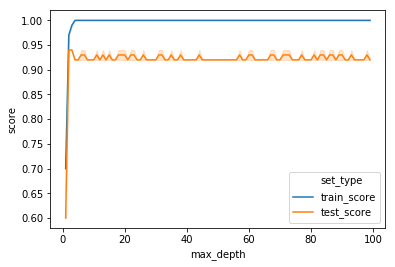

In [129]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [122]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
clf.score(X,y)

0.9797979797979798

In [52]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
clf.score(X_train,y_train)

0.9798657718120806

In [57]:
clf.score(X_test,y_test)

0.7728813559322034

In [59]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [61]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
clf.score(X_train,y_train)

0.8406040268456376

In [65]:
clf.score(X_test,y_test)

0.8067796610169492

In [67]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [70]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
clf.score(X_train,y_train)

0.8238255033557047

In [77]:
clf.score(X_test,y_test)

0.8203389830508474

In [87]:
scores_data = pd.DataFrame()

In [88]:
max_depth_values = range(1, 100)

In [91]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_score':[test_score]})
    scores_data = scores_data.append(temp_score_data)
    

In [93]:
scores_data.head(5)

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [95]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [97]:
scores_data_long.head(5)

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


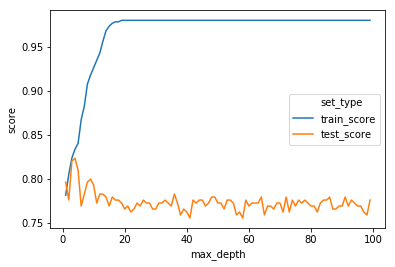

In [99]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [104]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])

In [111]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7650489009162987

In [112]:

scores_data = pd.DataFrame()
cores_data = pd.DataFrame()

In [113]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_score':[test_score],'mean_cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [124]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['mean_cross_val_score','train_score', 'test_score'],
                          var_name='set_type', value_name='score')

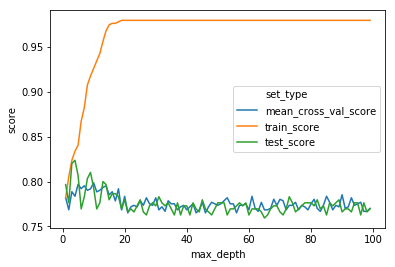

In [127]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [132]:
scores_data_long.query("set_type == 'mean_cross_val_score'")

,max_depth,set_type,score
0,1,mean_cross_val_score,0.781857
1,2,mean_cross_val_score,0.768553
2,3,mean_cross_val_score,0.788678
3,4,mean_cross_val_score,0.783580
4,5,mean_cross_val_score,0.796942
5,6,mean_cross_val_score,0.792026
6,7,mean_cross_val_score,0.795303
7,8,mean_cross_val_score,0.790190
8,9,mean_cross_val_score,0.791857
9,10,mean_cross_val_score,0.798622
